In [ ]:
import numpy as np #Imports the numpy library and aliases it as "np".

#Seting the various parameters used in the ant colony optimization algorithm
#including the number of ants 
#the number of iterations 
#the decay rate of pheromones 
#the alpha and beta parameters used to calculate probabilities 
#the pheromone deposit constant
#the pheromone bias constant.
num_ants = 10
num_iterations = 100
decay_rate = 0.5
alpha = 1
beta = 2
q = 1
pheromone_bias = 0.1


# Distance matrix
dist_matrix= np.array([[np.inf,61.72,164.05,80.48,146.04,205.22,161.45,94.95,81.18,91.27],
          [61.726,np.inf,102.87,141.03,109.48,263.11,199.60,155.90,88.96,69.49],
          [164.05,102.87,np.inf,243.89,130.10,365.22,290.06,256.15,171.47,116.29],
          [80.48,141.03,243.89,np.inf,200.61,126.10,119.19,42.63,115.27,163.99],
          [146.04,109.48,130.10,200.61,np.inf,295.86,191.43,232.34,87.52,173.83],
          [205.22,263.11,365.22,126.10,295.86,np.inf,123.41,138.28,210.17,289.83],
          [161.45,199.60,290.06,119.19,191.43,123.41,np.inf,159.45,118.73,251.75],
          [94.95,155.50,256.15,42.63,232.34,138.28,159.45,np.inf,150.99,160.31],
          [82.18,88.96,171.47,115.27,87.52,210.17,118.73,150.99,np.inf,153.50],
          [91.27,69.49,116.29,163.99,173.83,289.93,251.75,160.31,153.50,np.inf]]) # Set the distance matrix for the graph.

#Initialize the pheromone matrix with equal values for each edge in the graph.
pheromone_matrix = np.ones(dist_matrix.shape) / len(dist_matrix) 

# Initialize the best path and cost with None and infinity, respectively.
best_path = None
best_cost = float('inf') 

# Ant Colony Optimization algorithm
for i in range(num_iterations): #This loop runs for num_iterations iterations, where each iteration involves constructing ant paths and updating the pheromone levels.
    
#This initializes two arrays to keep track of the ant paths and their corresponding costs.
#ant_paths is a 2D numpy array with num_ants rows and len(dist_matrix) columns,
#where each row represents the path taken by a single ant. 
#ant_costs is a 1D numpy array with num_ants elements, where each element represents the cost of the corresponding ant's path.
    ant_paths = np.zeros((num_ants, len(dist_matrix)), dtype=int)
    ant_costs = np.zeros(num_ants)

    
    # Ant path construction
    for ant in range(num_ants): #This loop constructs a path for each ant.
        visited = [0] #visited is a list that stores the nodes visited by the ant, starting with the initial node (node 0).
        unvisited = list(range(1, len(dist_matrix))) #unvisited is a list of nodes that have not yet been visited.
        for j in range(1, len(dist_matrix)):# This loop runs for len(dist_matrix) - 1 iterations, where each iteration involves selecting the next node to visit.
            # Calculate probabilities of visiting unvisited nodes
            probs = np.zeros(len(unvisited))
            #These lines calculate the probabilities of each unvisited node being the next node on the ant's path.     
            for k in range(len(unvisited)): 
                #It uses the pheromone level (pheromone_matrix) and the distance between nodes (dist_matrix) to calculate the probability of each unvisited node.
                probs[k] = pheromone_matrix[visited[-1]][unvisited[k]] ** alpha * (1 / dist_matrix[visited[-1]][unvisited[k]]) ** beta #alpha and beta are constants that control the relative importance of the pheromone level and distance, respectively. 
            probs /= np.sum(probs)#The probabilities are normalized so they add up to 1 using probs /= np.sum(probs).
            
            # Choose next node to visit using probabilities
            next_node = np.random.choice(unvisited, p=probs) #It uses np.random.choice to randomly choose an unvisited node according to the probabilities calculated earlier.
            visited.append(next_node)#The chosen node is added to the visited list
            unvisited.remove(next_node)
        
        ant_paths[ant] = visited
        ant_costs[ant] = sum([dist_matrix[visited[j]][visited[j+1]] for j in range(len(visited)-1)]) #this line effectively calculates the cost of the path taken by the ant and stores it in the ant_costs dictionary.  
    
    # Update pheromone matrix
    pheromone_matrix *= decay_rate
    for ant in range(num_ants): # This line initiates a for loop that iterates over num_ants, For each iteration of this loop, the variable ant is assigned a value between 0 and num_ants-1.
        for j in range(len(dist_matrix)-1): # This line initiates another for loop that iterates over the range of the length of dist_matrix minus 1. The variable j is assigned a value between 0 and len(dist_matrix)-2.
            pheromone_matrix[ant_paths[ant][j]][ant_paths[ant][j+1]] += q / ant_costs[ant]# Here, ant_paths is a 2D list or array that stores the paths taken by each ant, where each row represents a single ant and the columns represent the nodes visited by that ant. 
                                                                                          #ant_paths[ant][j] represents the node visited by the antth ant at the jth position of its path, and ant_paths[ant][j+1] represents the node visited by the antth ant at the next position of its path.
                                                                                          #ant_costs is a list or array that stores the cost or length of each ant's path.
                                                                                          #ant_costs[ant] represents the cost of the antth ant's path.
    
    # Update best path and cost
    for ant in range(num_ants): # here we are initiates a for loop that iterates over num_ants, For each iteration of this loop, the variable ant is assigned a value between 0 and num_ants-1. 
        if ant_costs[ant] < best_cost: # here we are checking the condition whether ant_costs less than best_cost
            best_path = ant_paths[ant] # if the above condition satisfyes we are assigning ant_paths to best_path 
            best_cost = ant_costs[ant] # if the above condition satisfyes we are assigning ant_costs to best_cost 
    
    # Add pheromone bias to best path
    for j in range(len(best_path)-1):
        pheromone_matrix[best_path[j]][best_path[j+1]] += pheromone_bias / best_cost
print('Best path:', best_path)
print('Best cost:', best_cost)


Best path: [0 1 9 2 4 8 6 5 3 7]
Best cost: 875.99


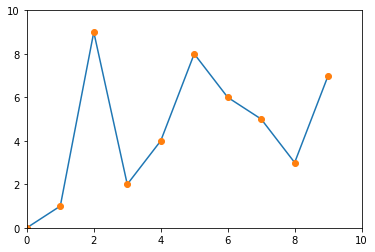

In [ ]:
import matplotlib.pyplot as plt # Importing matplotlib library as plt 
plt.plot(best_path) # we are plotting the bast_path array
plt.plot(best_path, 'o')
plt.axis([0, 10, 0, 10]) # we are giving the x and y axis start and end points for the graph
plt.show() # to show the image we are generating above